In [1]:
# This compares [Fe/H] as retrieved by our pipeline, and as found by nSSPP

# Created 2021 Dec. 5 by E.S.

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib qt

In [2]:
stem = "/Users/bandari/Documents/git.repos/rrlyrae_metallicity/"

rrlfe_results_file = "bin/retrieved_vals_test_20211203.csv"
nsspp_results_file = "notebooks_for_development/data/nSSPP82.out"
stacy_results_file = "notebooks_for_development/data/tloggfeoh2.dat"
phase_82_file = "notebooks_for_development/data/phase82.dat"

In [4]:
df_rrlfe = pd.read_csv(stem + rrlfe_results_file)
df_nsspp = pd.read_csv(stem + nsspp_results_file, delim_whitespace=True, 
                       names=["name","teff","logg","feh_nsspp","feh_beers"])
df_stacy = pd.read_csv(stem + stacy_results_file, delim_whitespace=True)
df_phase_82 = pd.read_csv(stem + phase_82_file, delim_whitespace=True, 
                          names = ["SDSSname", "hjd", "Sesar phase", "Sesar_cycles", "period", "g ephemeris", 
                                   "g amplitude", "Sesar type", "Drake phase", "Drake cycles", "Drake period", 
                                   "Drake V ephemeris", "Drake V amp", "Drake type", 
                                   "Drake2013b chart period", 
                                   "Drake2013b chart amp", 
                                   "Drake2013b chart type", 
                                   "Abbas2014 period", 
                                   "Abbas2014 amp", 
                                   "Abbas2014 type", 
                                   "Catalina DR2 chart period", 
                                   "Catalina DR2 chart amp", 
                                   "Catalina DR2 chart type", 
                                   "Drake MLS chart period", 
                                   "Drake MLS chart amp", 
                                   "Drake MLS chart type"])

In [5]:
# modify the right strings to compare among DataFrames

df_rrlfe["match_name"] = df_rrlfe["orig_spec_file_name"].str.split(".", expand = True, n=1)[0]
df_phase_82["82_match_name"] =  df_phase_82["SDSSname"].str.split(".", expand = True, n=1)[0]
df_rrlfe["match_name"] = df_rrlfe["match_name"].str.replace("g", "h")
df_phase_82["82_match_name"] = df_phase_82["82_match_name"].str.replace("G", "h")

In [6]:
df_rrlfe = df_rrlfe.rename(columns={"feh_retrieved": "rrlfe_feh_retrieved", 
                         "err_feh_retrieved": "rrlfe_err_feh_retrieved",
                         "teff_retrieved": "rrlfe_teff_retrieved"})
df_nsspp = df_nsspp.rename(columns={"teff": "nsspp_teff", "logg": "nsspp_logg"})

In [7]:
# merge them

df_merged = df_rrlfe.merge(df_nsspp, left_on="match_name", right_on="name")
#df_merged_w82 = df_merged.merge(df_phase_82, left_on="match_name", right_on="82_match_name")

In [8]:
df_merged.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_based_Robo',
       'err_EW_Balmer_based_noise_churning', 'rrlfe_feh_retrieved',
       'rrlfe_err_feh_retrieved', 'rrlfe_teff_retrieved', 'match_name', 'name',
       'nsspp_teff', 'nsspp_logg', 'feh_nsspp', 'feh_beers'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

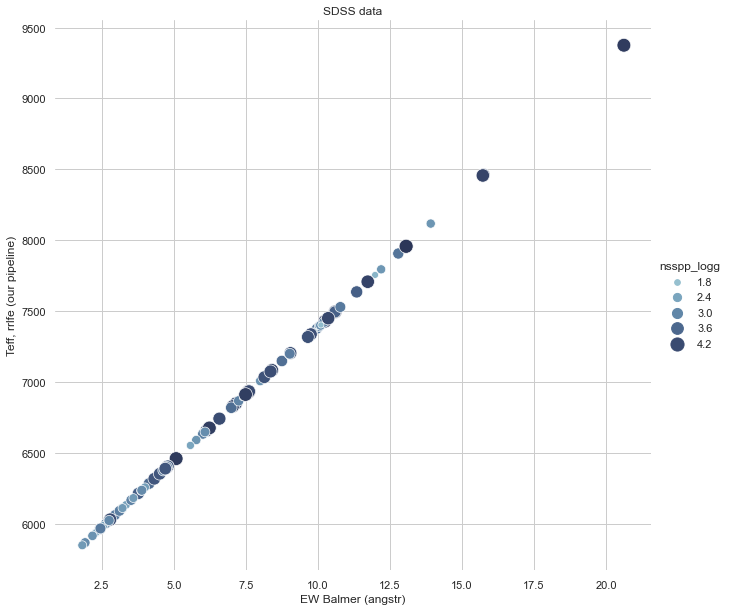

In [9]:
# color-code with [our] Fe/H, logg

plt.clf()

sns.set_theme(style="whitegrid")

# nsspp_teff
# rrlfe_teff_retrieved

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_merged,
    x="EW_Balmer", y="rrlfe_teff_retrieved",
    hue="nsspp_logg", hue_norm=(1.,5.), size="nsspp_logg",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
#plt.plot([6000,8000], [6000,8000], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("EW Balmer (angstr)")
g.ax.set_ylabel("Teff, rrlfe (our pipeline)")
#g.ax.set_ylabel("Teff, nSSPP")
g.despine(left=True, bottom=True)
g.ax.set_title("SDSS data")
g.despine(left=True, bottom=True)

plt.savefig("junk_teff_retrieved.pdf")

In [25]:
plt.clf()

plt.scatter(df_rrlfe["rrlfe_teff_retrieved"],df_rrlfe["err_EW_CaIIK_from_robo"], label="CaIIK",s=20)
plt.scatter(df_rrlfe["rrlfe_teff_retrieved"],df_rrlfe["err_EW_Balmer_based_Robo"], label="Balmer",s=20)
plt.scatter(df_rrlfe["rrlfe_teff_retrieved"],df_rrlfe["err_EW_Hgamma_from_robo"], label="Hgamma",s=20)
plt.scatter(df_rrlfe["rrlfe_teff_retrieved"],df_rrlfe["err_EW_Hdelta_from_robo"], label="Hdelta",s=20)
plt.xlabel("Teff retrieved by rrlfe")
plt.ylabel("EW absolute error from Robospect")
plt.ylim([0,10])
plt.legend()
plt.show()


In [31]:
plt.clf()

plt.scatter(df_rrlfe["rrlfe_teff_retrieved"],np.divide(df_rrlfe["err_EW_CaIIK_from_robo"],df_rrlfe["EW_CaIIK"]), label="CaIIK",s=20)
plt.scatter(df_rrlfe["rrlfe_teff_retrieved"],np.divide(df_rrlfe["err_EW_Balmer_based_Robo"],df_rrlfe["EW_Balmer"]), label="Balmer",s=20)
plt.scatter(df_rrlfe["rrlfe_teff_retrieved"],np.divide(df_rrlfe["err_EW_Hgamma_from_robo"],df_rrlfe["EW_Hgamma"]), label="Hgamma",s=20)
plt.scatter(df_rrlfe["rrlfe_teff_retrieved"],np.divide(df_rrlfe["err_EW_Hdelta_from_robo"],df_rrlfe["EW_Hdelta"]), label="Hdelta",s=20)
plt.xlabel("Teff retrieved by rrlfe")
plt.ylabel("EW relative error from Robospect")
plt.ylim([0,4])
plt.legend()
plt.show()


In [22]:
df_rrlfe.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_based_Robo',
       'err_EW_Balmer_based_noise_churning', 'rrlfe_feh_retrieved',
       'rrlfe_err_feh_retrieved', 'rrlfe_teff_retrieved', 'match_name'],
      dtype='object')

In [13]:
# check: how many rows are in each DataFrame?

print(len(df_rrlfe))
print(len(df_nsspp))
print(len(df_master))

2679
218
94


In [15]:
print(len(df_merged_left)) # all the 
print(len(df_merged_right))
print(len(df_merged_outer)) # stripe 82 stars + 
print(len(df_merged_inner))

2679
218
2803
94
